---
# Exercício Boston - Linear Regression
---

**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**


## Introdução

**Boston Dataset (ATENÇÃO: Este dataset tem um problema ético na Variável 'B')**  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

O conjunto de dados de preços de imóveis de Boston tem um problema ético. Você pode consultar a documentação desta função para mais detalhes.  
Os mantenedores do scikit-learn, portanto, desencorajam fortemente o uso desse conjunto de dados, a menos que o objetivo do código seja estudar e educar sobre questões éticas em ciência de dados e aprendizado de máquina.  
<br>
The features can be summarized as follows:  
CRIM: Per capita crime rate by town  
ZN: Proportion of residential land zoned for lots larger than 25,000 sq.ft.  
INDUS: Proportion of non-retail business acres per town.  
CHAS: Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)  
NOX: Nitric oxides concentration (parts per 10 million)  
RM: Average number of rooms per place of residence  
AGE: Proportion of owner-occupied units built prior to 1940  
DIS: Weighted distances to five Boston employment centers  
RAD: Index of accessibility to radial highways  
TAX: Full-value property-tax rate per US 10,000  
PTRATIO: Pupil-teacher ratio by town  
**B: Calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town**  
LSTAT: Percentage lower status of the population  
MEDV: Median value of owner-occupied homes in $1000s


### **Descrição do projeto de machine learning**

Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.

**1- Descrição do problema ou tarefa:**  
Prever o valor médio dos imóveis da cidade de Boston (em 1.000s dolares) com base nas características do bairro e do imóvel.  
**2- Descrição da solução de IA:**  
Treinamento supervisionado de modelo de regressão para predição do valor médio dos imóveis da cidade de Boston com base em 13 atributos (características).  
**3- Fonte de dados:**  
Boston Dataset:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html  
**4- Variáveis independentes (preditoras ou "features"):**  
CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT.  
**5- Variável dependente (resposta ou "target"):**  
 MEDV valor médio do imóvel em 1.000s


In [6]:
# !pip install lightgbm

## Carregar bibliotecas de código


In [7]:
# importar biblioteca Pandas
import pandas as pd

# importar Matplotlib biblioteca de gráficos
import matplotlib.pyplot as plt

# importar Seaborn biblioteca de gráficos
import seaborn as sns

# Importar Numpy, train_test_split
import numpy as np
from sklearn.model_selection import train_test_split

# importa o modelo de regressão linear, metrics, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

## 1- Análise exploratória dos dados


In [8]:
# Caminho alternativo para o dataset Boston House prices.
import pandas as pd

# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
url = "../dados/boston_housing.csv"
column_names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]

data = pd.read_csv(url, header=None, delimiter=r"\s+", names=column_names)

# save the dataframe to a CSV file
data.to_csv("../dados/boston_housing_bkp.csv", index=False)

In [9]:
# Carregar  e instanciar dataset
# from sklearn.datasets import load_boston
# boston = load_boston()
# Ler e Converter sklearn dataset em pandas dataframe
# df=pd.DataFrame(boston.data,columns=boston.feature_names)
# df['price']= boston.target

In [10]:
# Ler e Converter sklearn dataset em pandas dataframe
df = pd.read_csv("../dados/boston_housing.csv")
# Cria nova coluna target
# rename specific column names
df.rename(columns={"MEDV": "price"}, inplace=True)
# Mostra as dimensões do dataset e as primeiras linhas
print("Dimensões do dataset: ", df.shape)
df.head()

Dimensões do dataset:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
# Verifica o total de valores nulos no dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [12]:
# Mostrar informações do dataframe (.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# Lista as variáveis independentes ("features")
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [15]:
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


[Text(0.5, 1.0, 'Valor do imóvel x Quantidade de quartos')]

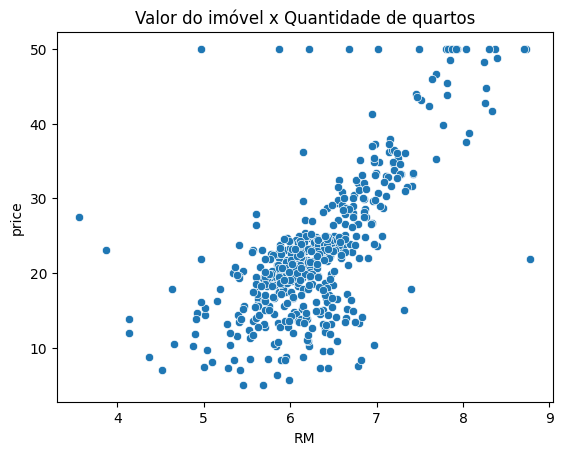

In [16]:
sns.scatterplot(x=df.RM, y=df.price).set(
    title="Valor do imóvel x Quantidade de quartos"
)

[Text(0.5, 1.0, 'Imóveis por intervalo de preço')]

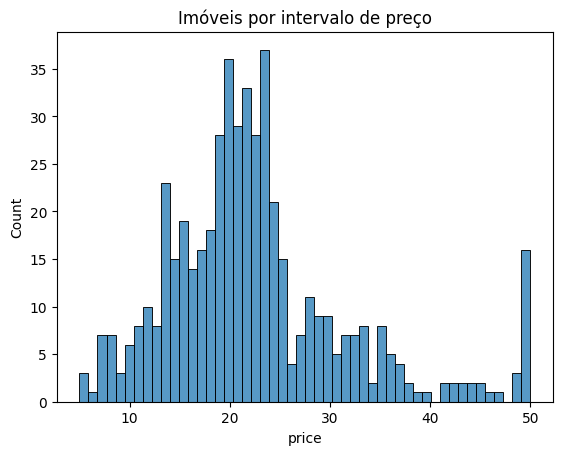

In [17]:
sns.histplot(data=df, x="price", bins=50).set(title="Imóveis por intervalo de preço")

#### Matrix de Correlação

Nos modelos de regressão linear, ter mais variáveis independentes (features), nem sempre significa melhor desempenho do modelo. Mais features podem levar a um declínio no desempenho do modelo se contiverem features irrelevantes, criando ruído desnecessário em nosso modelo.  
A correlação nos diz o quanto uma variável muda para uma ligeira mudança em outra variável.  
Pode assumir valores positivos, negativos e zero dependendo da direção da mudança. Um alto valor de correlação entre uma variável dependente e uma variável independente indica que a variável independente tem uma peso grande na determinação da predição.
Features redundantes:  
Embora algumas features sejam altamente relevantes para nossa variável dependente (target), elas podem ser redundantes.  
Quaisquer 2 variáveis ​​independentes são consideradas redundantes se forem altamente correlacionadas. Isso causa um desperdício desnecessário de tempo e espaço.  
Importante:

- Uma alta correlação entre as variáveis ​​dependentes e independentes é desejada, enquanto a alta correlação entre 2 variáveis ​​independentes é indesejada.
- Se duas variáveis independentes (features) são altamente correlacionadas, portanto redundantes, devemos manter a feature com maior correlação com a variável dependente (target) e excluir a outra de menor correlação.  
  Fonte: https://towardsdatascience.com/understanding-feature-extraction-using-correlation-matrix-and-scatter-plots-6c19e968a60c


<Axes: >

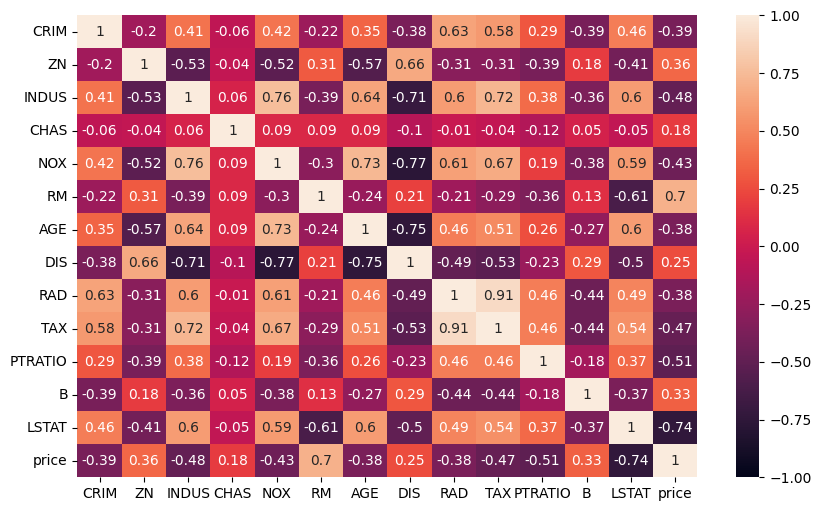

In [18]:
# Mostrar mapa de calor (heatmap) da matriz de correlação de todas as variáveis
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_corr.round(2), annot=True, vmin=-1, vmax=1)

In [19]:
# listar as correlações com a variável price (target)
df_corr.price[:-1].sort_values(ascending=False)

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: price, dtype: float64

**Conclusão:** As variáveis RM e ZN são as duas com maior correlação **positiva** e as variáveis PTRATIO e LSTAT são as duas com maior correlação **negativa** em relação à variável dependente, que é o preço médio do imóvel (variável dependente).


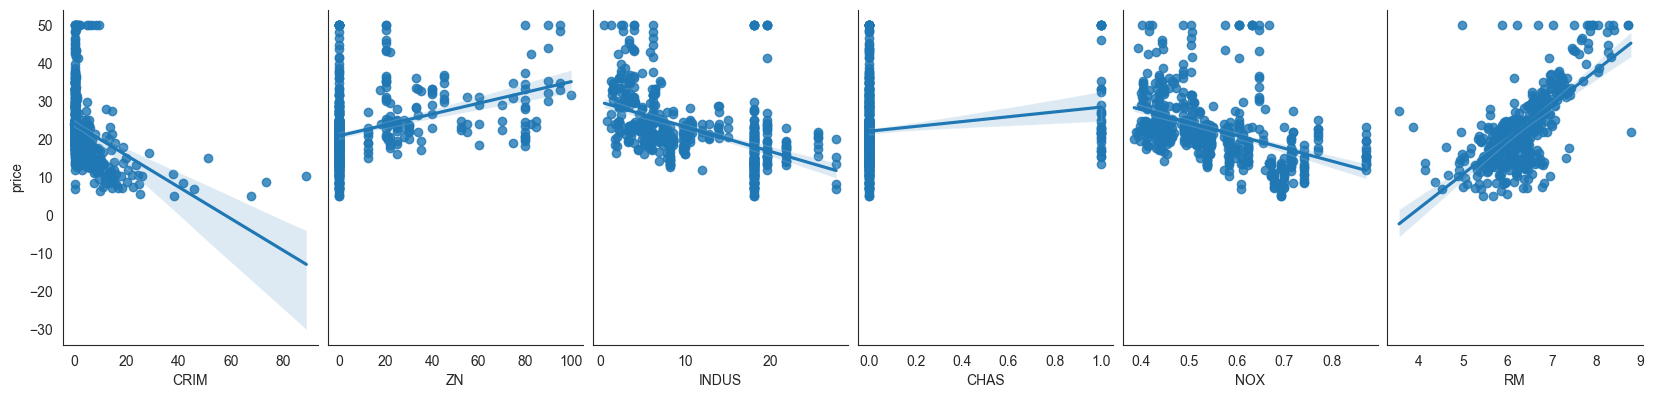

In [20]:
# Apresentar gráfico mostrando as relações entre as variáveis independentes e a dependente (vendas).
sns.set_style("white")
sns.pairplot(
    df,
    x_vars=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM"],
    y_vars="price",
    height=4,
    aspect=0.7,
    kind="reg",
)

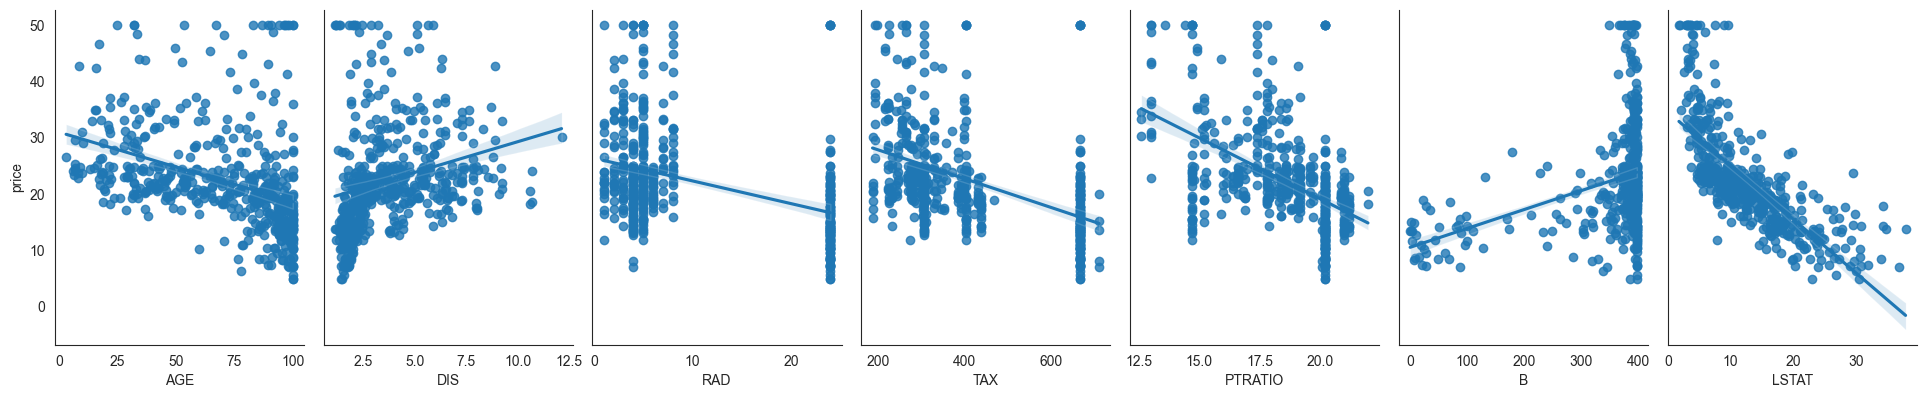

In [21]:
sns.pairplot(
    df,
    x_vars=["AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"],
    y_vars="price",
    height=4,
    aspect=0.7,
    kind="reg",
)

### Quais gráficos possuem a maioria dos pontos mais próximos da reta de regressão?


# Preparação dos dados

O scikit-learn espera que X (matriz de 'features') e y (vetor de resposta) sejam matrizes NumPy.
No entanto, o Pandas é construído sobre o NumPy.
Assim, X pode ser um Pandas DataFrame e y pode ser uma série do Pandas.


In [22]:
# atribuir os valores das variáveis independentes a 'X'
# Atribuir a X um subset do dataframe
X = df.drop(["price"], axis=1)

# select a Series from the DataFrame
y = df["price"]

print("X = ", X.shape)
print("y = ", y.shape)

X =  (506, 13)
y =  (506,)


In [23]:
# Divide o dataset em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# Confere as dimensões dos datasets de treino e teste
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


### Normalização dos dados

Uma das formas de normalizar as variáveis independentes, é removendo de cada coluna, a sua respectiva média e dividindo pelo seu respectivo desvio padrão.  
Se uma feature tem um intervalo de valores que é ordens de magnitude maior que as outras features, ela pode dominar a função objetivo e tornar o modelo incapaz de aprender com outras features corretamente como esperado.  
A Normalização de um conjunto de dados é um requisito comum para muitos algoritmos de aprendizado de máquina: eles podem se comportar mal se os recursos individuais não se parecerem mais ou menos com dados normalmente distribuídos padrão (por exemplo, Gaussiano com média 0 e variação unitária).  
Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
df_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.250878,-0.483268,1.037881,-0.267615,1.655125,-0.179950,1.141979,-0.892753,1.718560,1.577749,0.790924,-3.681038,1.883666
1,7.607440,-0.483268,1.037881,-0.267615,1.117483,-0.469714,1.141979,-0.944986,1.718560,1.577749,0.790924,-3.605018,1.083190
2,0.338513,-0.483268,1.037881,-0.267615,1.417152,-0.285454,0.583952,-0.516781,1.718560,1.577749,0.790924,0.451335,0.270357
3,-0.396772,-0.483268,-0.850151,-0.267615,-0.327983,0.063750,-1.072243,1.234092,-0.510515,-1.087626,0.790924,0.374675,-0.968114
4,0.858822,-0.483268,1.037881,-0.267615,1.302573,-1.838293,1.034666,-0.960244,1.718560,1.577749,0.790924,0.451335,1.777943


In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
df_norm.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-3.517538e-17,3.517538e-17,-2.022585e-16,-5.276307e-17,3.517538e-17,-1.859898e-15,-3.385631e-16,2.022585e-16,-5.276307e-17,5.276307e-17,9.618269e-16,1.934646e-16,-3.341661e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.016201e-01,-4.832684e-01,-1.541893e+00,-2.676155e-01,-1.412082e+00,-3.581337e+00,-2.220491e+00,-1.259974e+00,-9.797943e-01,-1.310746e+00,-2.735218e+00,-3.776996e+00,-1.510460e+00
25%,-3.933178e-01,-4.832684e-01,-8.501509e-01,-2.676155e-01,-8.744395e-01,-5.852482e-01,-8.880228e-01,-8.044467e-01,-6.278350e-01,-7.454090e-01,-5.081806e-01,2.147456e-01,-7.748604e-01
50%,-3.739421e-01,-4.832684e-01,-3.573029e-01,-2.676155e-01,-1.781481e-01,-1.331415e-01,2.351852e-01,-2.874667e-01,-5.105152e-01,-4.484186e-01,2.805616e-01,3.912015e-01,-1.882340e-01
75%,-9.847133e-02,5.287075e-02,1.037881e+00,-2.676155e-01,6.327228e-01,5.128843e-01,9.282474e-01,6.538807e-01,-1.585559e-01,1.577749e+00,7.909243e-01,4.452578e-01,5.786023e-01
max,9.289481e+00,3.805844e+00,2.447690e+00,3.736705e+00,2.809735e+00,3.643453e+00,1.141979e+00,3.886962e+00,1.718560e+00,1.849111e+00,1.626063e+00,4.513351e-01,3.465394e+00


# Treinar o modelo


In [29]:
# instancia modelo de regressão linear
reg_lin = LinearRegression()

# treina o modelo (aprende os coeficientes)
reg_lin.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print(
    "R2_score = ",
    r2_score(y_test, y_pred),
    "\n R2 Captou 75% da variabilidade dos seus dados de treinamento.",
)
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_score =  0.6741502535129148 
 R2 Captou 75% da variabilidade dos seus dados de treinamento.
MAE =  3.7175346045915374
MSE =  28.903378639116035
RMSE =  5.37618625413183


# Testar o modelo (inferência)


In [30]:
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)

In [31]:
# mostrar resultado da predição
y_pred

array([16.89548221, 20.06775258, 19.98541588, 15.10147265, 27.15644442,
       28.80581707, 42.00075624, 20.60249298, 22.64128271, 19.87438521,
       24.02435734, 22.39979438, 27.54898946, 16.42034002, 37.15806173,
       36.80182828, 12.57624275, 29.04801067, 19.23491626, 25.37369352,
       24.1130279 , 12.05105558, 24.65653303, 41.9699699 , 34.43977662,
       38.44954633, 20.03690356, 28.20691354, 20.16465176, 29.92243416,
       20.94452631, 20.44569801, 34.51460421, 13.20723369, 12.33764004,
       13.37400232,  6.21858856, 30.63187217, 35.83734854, 12.93559249,
       25.03877072, 10.48935699, 19.98693279, 40.82684402, 14.01777647,
       42.363511  , 22.85848957, 17.40178107, 23.37291132, 26.89127974,
       17.09250098, 27.80589478, 17.2428601 , 24.99650998, 20.7493613 ,
       21.56122552, 32.01619148, 28.36464118, 13.216211  , 35.63080293,
       22.60697233, 28.82768085, 20.69130011, 28.47092195, 17.09091646,
       18.54400557, 19.24674957, 24.55617519, 30.66031041, 15.88

## Avaliar qualidade do modelo

A métrica mais utilizada é o RMSE (root mean square error): é a métrica que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e as predições do modelo treinado.  
Ao comparar vários modelos, o melhor modelo será aquele que tiver o menor RMSE.  
Quanto **menor** for o RMSE, melhor.  
<br>
Outra métrica bastante utilizada é:  
R-quadrado (R^2) = percentual da variância de y que é explicada pelas variáveis preditoras do modelo de regressão.  
Quanto **maior** for o R-quadrado, melhor.


In [32]:
# Cálculo do RMSE usando o scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.37618625413183


**Se tirarmos a variável "B" com problema ético, como ficaria o desempenho do modelo?**


In [33]:
# cria uma lista contendo nomes das features, desta vez sem 'newspaper'
feature_cols = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "LSTAT",
]
# usa a lista e atribui a X um subset do dataframe
X = df[feature_cols]

# select a Series from the DataFrame
y = df["price"]

# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# treina o modelo (aprende os coeficientes)
reg_lin.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.751
MAE =  3.869
MSE =  24.568
RMSE =  4.957


R-quadrado = percentual da variância de y que é explicada pelas variáveis preditoras do modelo de regressão.


### Acabamos de verificar que o erro diminuiu ao eliminarmos a variável 'newspaper'.


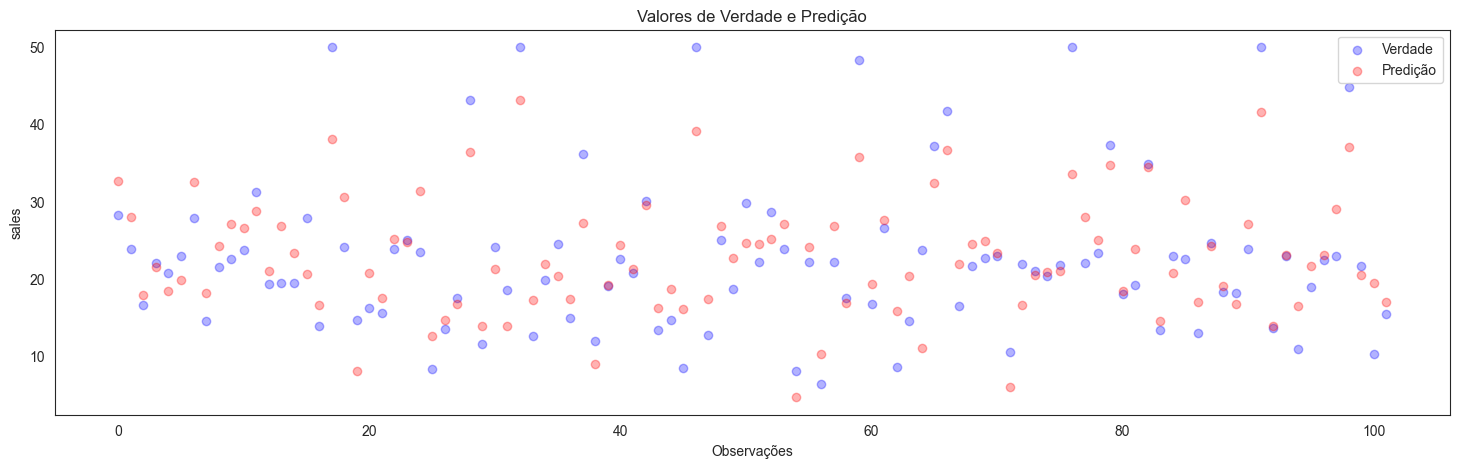

In [34]:
# Como podemos visualizar os resíduos das predições
import matplotlib.pyplot as plt

# Plotar gráfico dispersão sales x Observações, com os valores das 40 amostras de teste e valores reais.
plt.figure(figsize=(18, 5))
plt.scatter(x=range(0, y_test.size), y=y_test, c="blue", label="Verdade", alpha=0.3)
# Plotar no mesmo gráfico dispersão sales x Observações, com os valores das predições para as 40 amostras de teste
plt.scatter(x=range(0, y_pred.size), y=y_pred, c="red", label="Predição", alpha=0.3)
# Mostrar título, e eixos X e Y
plt.title("Valores de Verdade e Predição")
plt.xlabel("Observações")
plt.ylabel("sales")
plt.legend()
plt.show()

In [35]:
# Criar dataframe com y_test (verdade) e y_pred (predições)
df_result = pd.DataFrame(y_test)
df_result["predição"] = y_pred
df_result.columns = ["verdade", "predição"]
# Mostrar as primeiras linhas para conferir com o gráfico acima.
df_result[:5]

,verdade,predição
307,28.2,32.644661
343,23.9,28.021502
47,16.6,17.930763
67,22.0,21.470773
362,20.8,18.372414


## Treinar outros modelos regressores


In [36]:
# Cria variáveis com nomes e estimadores (regressores)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [62]:
# Loop para treinamento (fit) de varios modelos regressores e mostra os desempenhos
%%time
for name, regressor in zip(names, classifiers):
    regr = regressor.fit(X_train, y_train)
    y_pred = reg_ensemble.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3)
    print("{} score: {}".format(name, score))
print('\n')

UsageError: Line magic function `%%time` not found.


In [38]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5)
# treina o modelo (aprende os coeficientes)
reg_tree.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_tree.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.859
MAE =  2.912
MSE =  13.971
RMSE =  3.738


In [39]:
from sklearn import linear_model

reg_lasso = linear_model.Lasso(alpha=0.1)
# treina o modelo (aprende os coeficientes)
reg_lasso.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lasso.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.736
MAE =  3.921
MSE =  26.085
RMSE =  5.107


In [40]:
from sklearn import linear_model

reg_lassoLars = linear_model.LassoLars(alpha=0.1, normalize=False)
# treina o modelo (aprende os coeficientes)
reg_lassoLars.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lassoLars.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.736
MAE =  3.921
MSE =  26.085
RMSE =  5.107


C:\Users\carlo\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_base.py:116: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [41]:
from sklearn import linear_model

reg_ridge = linear_model.Ridge(alpha=0.5)
# treina o modelo (aprende os coeficientes)
reg_ridge.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_ridge.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.753
MAE =  3.851
MSE =  24.397
RMSE =  4.939


In [42]:
from sklearn import svm

reg_svr = svm.SVR(kernel="linear")
# treina o modelo (aprende os coeficientes)
reg_svr.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_svr.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.741
MAE =  3.721
MSE =  25.589
RMSE =  5.059


In [43]:
from sklearn import svm

reg_svr_krbf = svm.SVR(kernel="rbf")
# treina o modelo (aprende os coeficientes)
reg_svr_krbf.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_svr_krbf.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.168
MAE =  5.524
MSE =  82.206
RMSE =  9.067


In [44]:
from sklearn.ensemble import RandomForestRegressor

reg_rfregressor = RandomForestRegressor(n_estimators=10, random_state=1)
# treina o modelo (aprende os coeficientes)
reg_rfregressor.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_rfregressor.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.894
MAE =  2.44
MSE =  10.482
RMSE =  3.238


In [45]:
from sklearn.ensemble import VotingRegressor

reg_ensemble = VotingRegressor(
    [
        ("reg_rfregressor", reg_rfregressor),
        ("reg_lin", reg_lin),
        ("reg_ridge", reg_ridge),
        ("reg_svr", reg_svr),
    ]
)
# treina o modelo (aprende os coeficientes)
reg_ensemble.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_ensemble.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.816
MAE =  3.294
MSE =  18.147
RMSE =  4.26


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

reg_gboost = GradientBoostingRegressor()
# treina o modelo (aprende os coeficientes)
reg_gboost.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_gboost.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.921
MAE =  2.131
MSE =  7.822
RMSE =  2.797


In [47]:
#!pip install xgboost

In [48]:
from xgboost import XGBRegressor

reg_xgboost = XGBRegressor(objective="reg:squarederror")
# treina o modelo (aprende os coeficientes)
reg_xgboost.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_xgboost.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.923
MAE =  2.132
MSE =  7.592
RMSE =  2.755


In [49]:
# !pip install lightgbm

In [50]:
from lightgbm import LGBMRegressor

reg_lightgbm = LGBMRegressor()
# treina o modelo (aprende os coeficientes)
reg_lightgbm.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lightgbm.predict(X_test)
# Cálculo do R^2 (R-squared) usando o scikit-learn
print("R2_score = ", r2_score(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred).round(3))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred).round(3))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

R2_score =  0.9
MAE =  2.446
MSE =  9.839
RMSE =  3.137


### Avalia o modelo com Cross validation


In [51]:
# lightgbm for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

model = reg_lightgbm
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    model,
    X,
    y,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    error_score="raise",
)
print("MAE: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

MAE: -2.185 (0.395)


In [52]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [53]:
model = reg_lightgbm
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    model, X, y, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1
)
print("RMSE: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))
n_scores = cross_val_score(model, X, y, scoring="r2", cv=5, n_jobs=-1)
print("R-square: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

RMSE: -4.609 (1.171)
R-square: 0.574 (0.284)


In [54]:
model = reg_xgboost
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    model, X, y, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1
)
print("RMSE: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))
n_scores = cross_val_score(model, X, y, scoring="r2", cv=5, n_jobs=-1)
print("R-square: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

RMSE: -4.189 (0.930)
R-square: 0.655 (0.205)


In [55]:
n_scores = cross_val_score(model, X, y, scoring="r2", cv=5, n_jobs=-1)
print("R^2: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

R^2: 0.655 (0.205)


In [56]:
print(cross_val_score(reg_lightgbm, X, y, cv=10).mean())

0.4785263064119606


## Como testar vários classificadores


In [57]:
# Cria variáveis com nomes e classes dos estimadores (classificadores)
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [58]:
# Loop para treinamento (fit) de todos os classificadores e imprime a respectiva acurácia.
# !%%time
for name, regressor in zip(names, classifiers):
    regr = regressor.fit(X_train, y_train)
    y_pred = reg_ensemble.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3)
    print("{} score: {}".format(name, score))
print("\n")

ValueError: Unknown label type: 'continuous'

## Gradient Boosting with Scikit-Learn, XGBoost, LightGBM, and CatBoost

by Jason Brownlee on April 1, 2020 in Ensemble Learning

https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/


In [ ]:
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
model = XGBRegressor(objective="reg:squarederror")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    model,
    X,
    y,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    error_score="raise",
)
print("MAE: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBRegressor(objective="reg:squarederror")
model.fit(X, y)
# make a single prediction
row = [
    2.02220122,
    0.31563495,
    0.82797464,
    -0.30620401,
    0.16003707,
    -1.44411381,
    0.87616892,
    -0.50446586,
    0.23009474,
    0.76201118,
]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print("Prediction: %.3f" % yhat[0])

MAE: -15.048 (1.316)
Prediction: -93.434


#### Light GBM


In [ ]:
# evaluate the model
from lightgbm import LGBMRegressor

reg_lightgbm = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    model,
    X,
    y,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    error_score="raise",
)
print("MAE: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

MAE: -15.048 (1.316)
